In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.shape

(4240, 16)

In [6]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<AxesSubplot:>

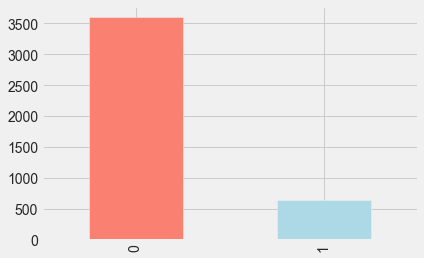

In [8]:
df.TenYearCHD.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [9]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [10]:
categorical_val

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [11]:
continous_val

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

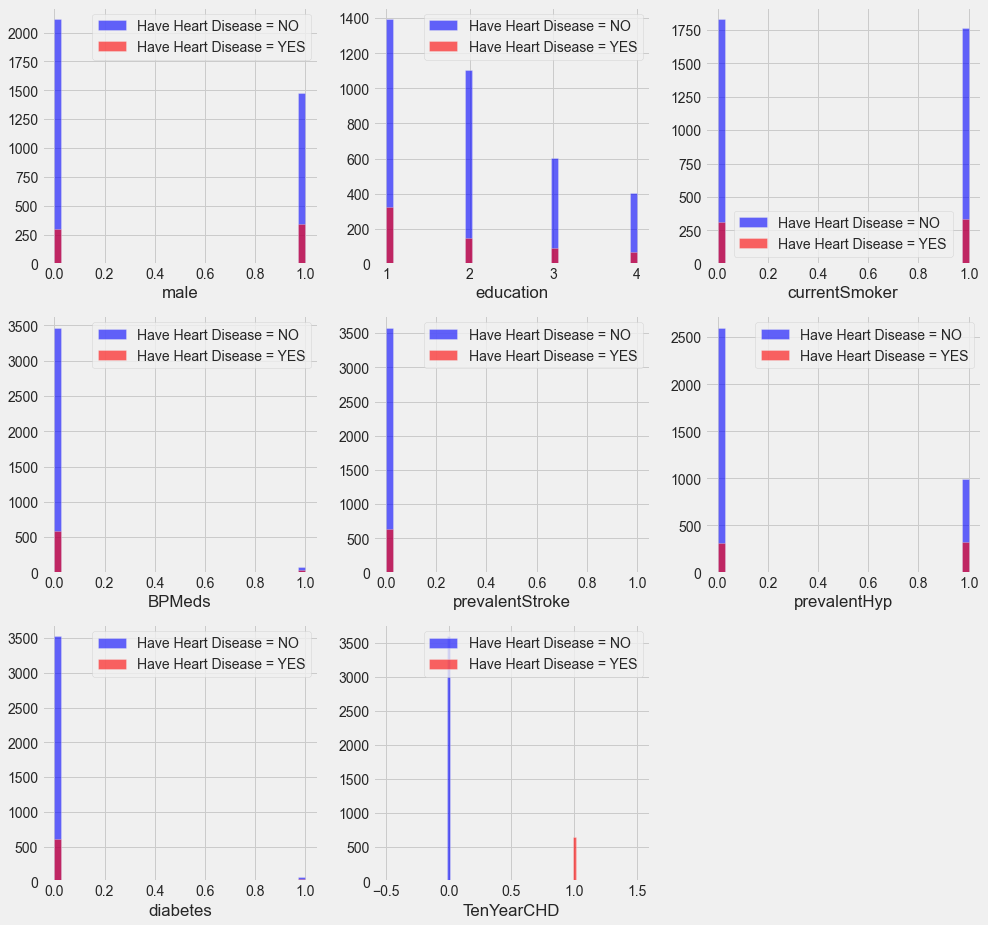

In [12]:

plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["TenYearCHD"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["TenYearCHD"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [13]:
#sns.pairplot(df, hue=df.TenYearCHD)

<AxesSubplot:xlabel='age', ylabel='count'>

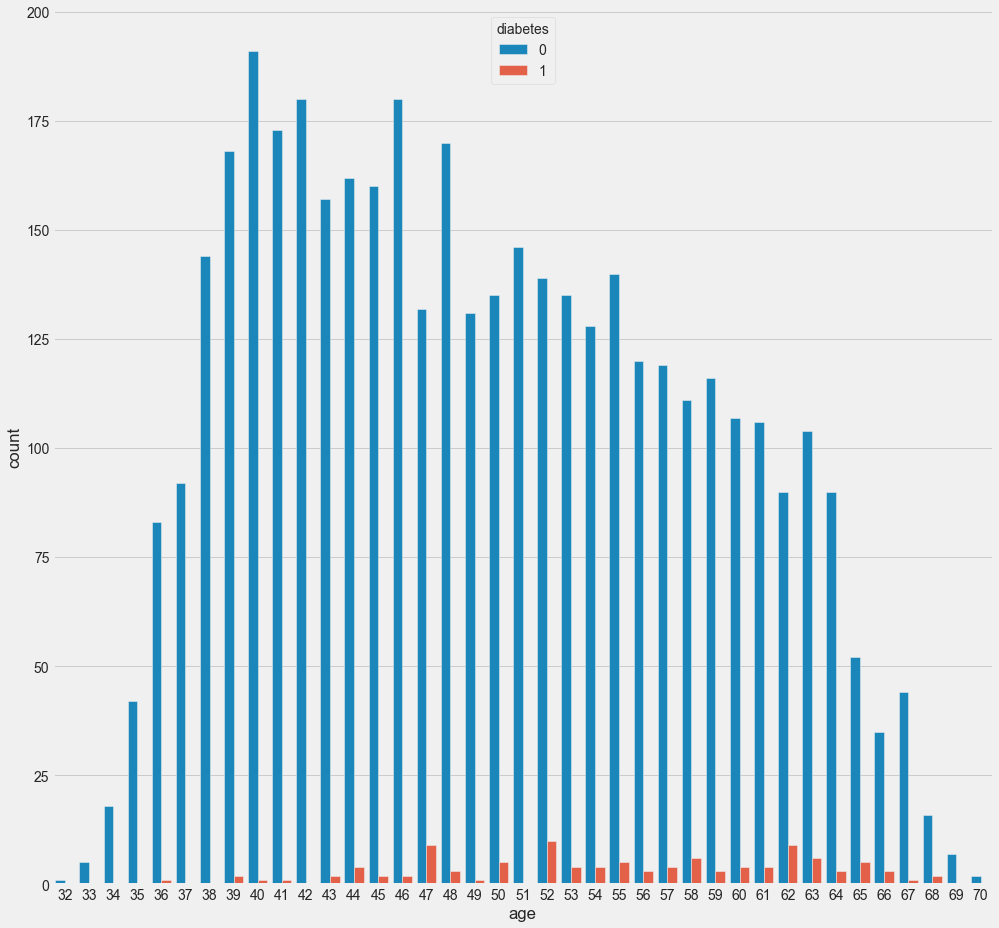

In [14]:
plt.figure(figsize=(15, 15))
sns.countplot(x=df.age,hue=df.diabetes)

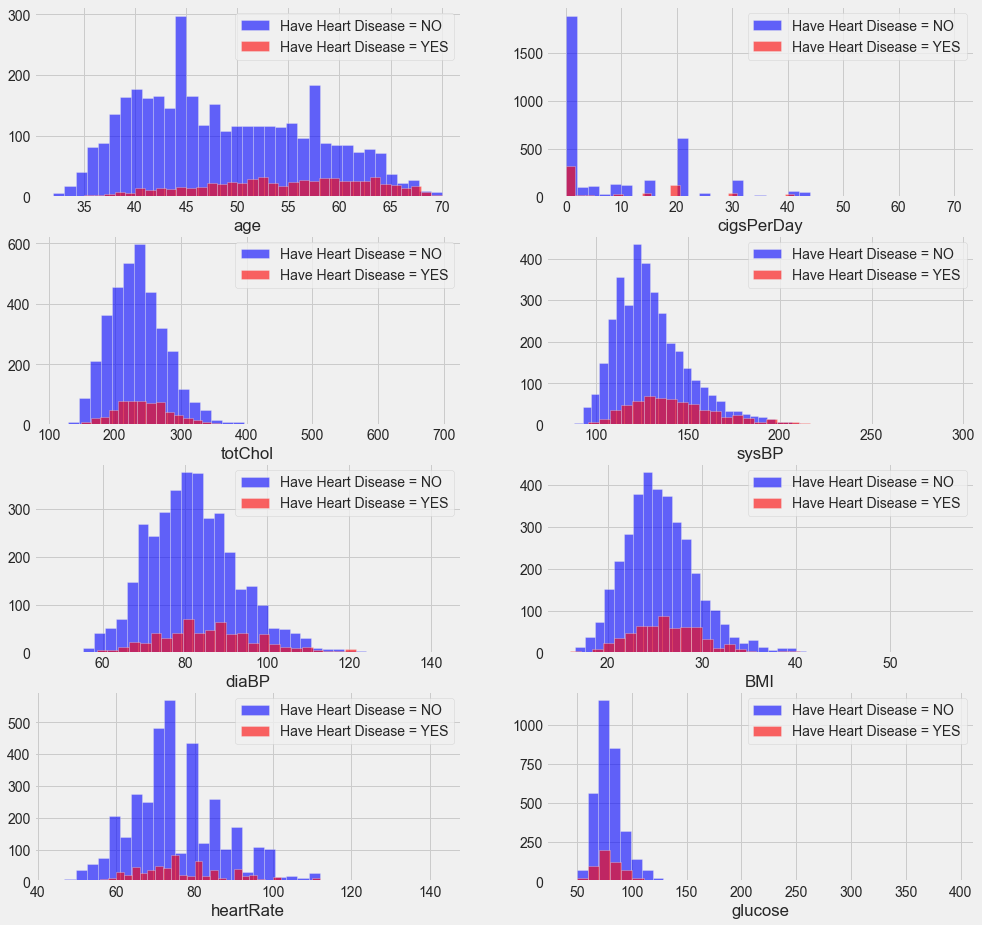

In [15]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(4, 2, i)
    df[df["TenYearCHD"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["TenYearCHD"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [16]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [17]:
#from sklearn.impute import SimpleImputer
#mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#def MeanImputation(df,col):
 # df[col]=mean_imp.fit_transform(df[col].values.reshape(-1,1))

In [18]:
for i in df.columns:
   df[i]=df[i].fillna(np.mean(df[i]))

In [19]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

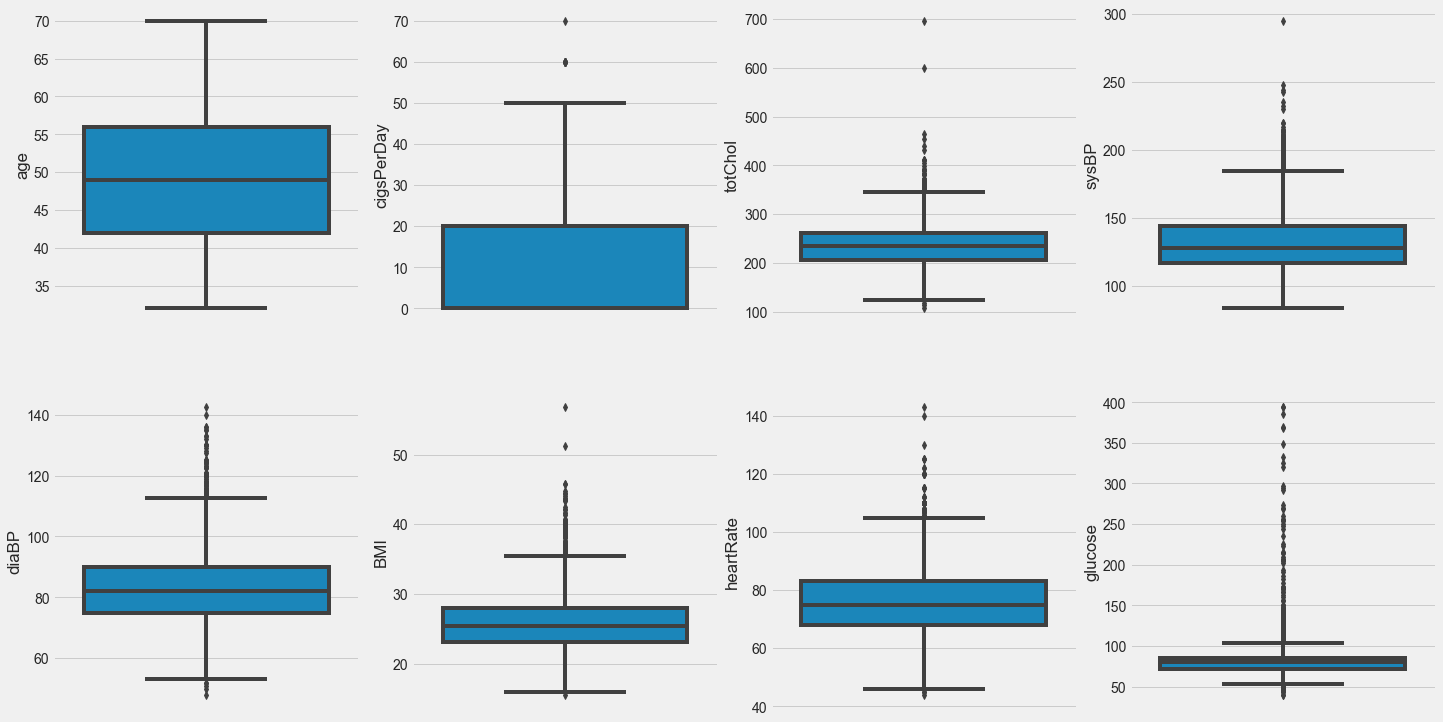

In [20]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
new=df[continous_val]
axs = axs.flatten()
for k,v in new.items():
    sns.boxplot(y=k, data=new, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<ipython-input-21-81ded25d68f1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.glusoce=np.log(df.glucose)


<AxesSubplot:>

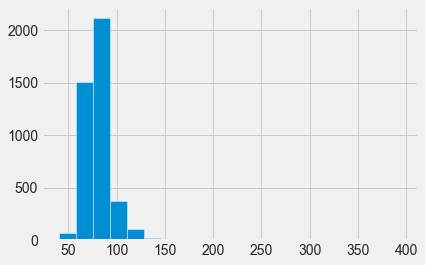

In [21]:
df.glusoce=np.log(df.glucose)
df.glucose.hist(bins=20)

Removing outliers using IQR

In [22]:
for k, v in df[continous_val].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]

(16.5, -0.5)

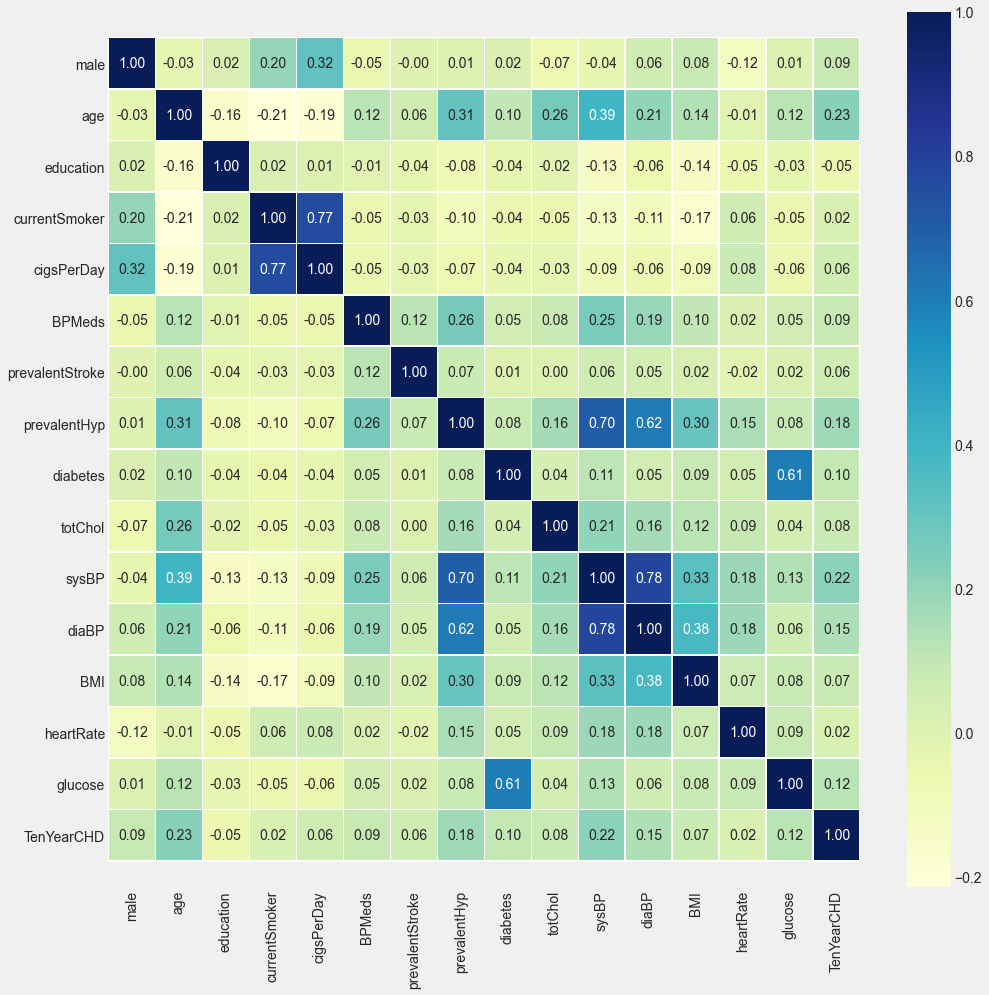

In [23]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [24]:
df=df.drop(['currentSmoker','sysBP'], axis=1)
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,84.0,23.10,85.0,85.0,0


In [25]:
X=df.drop('TenYearCHD', axis=1)
Y=df.TenYearCHD

In [26]:
cols=X.columns

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.153113,-1.234283,2.006584,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,-0.940825,-1.083027,0.287258,0.342775,-2.174271e-01
1,-0.867217,-0.417664,0.020414,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.300085,-0.159355,0.719668,1.590435,-2.612309e-01
2,1.153113,-0.184345,-0.972671,0.925410,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.187275,-0.243325,-0.113213,-0.073111,-5.240539e-01
3,-0.867217,1.332233,1.013499,1.767146,-1.758000e-01,-0.077014,1.489778,-0.162437,-0.263965,1.016227,0.682815,-0.904884,9.214724e-01
4,-0.867217,-0.417664,1.013499,1.177931,-1.758000e-01,-0.077014,-0.671241,-0.162437,1.089756,0.092555,-0.663554,0.758662,1.330035e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.867217,-0.184345,0.020414,0.925410,2.059493e-17,-0.077014,-0.671241,-0.162437,0.254961,-0.915087,-0.933810,0.675484,1.768073e-01
4236,-0.867217,-0.650984,-0.972671,0.504542,-1.758000e-01,-0.077014,-0.671241,-0.162437,-0.602395,0.344466,-1.631564,0.841839,-6.224898e-16
4237,-0.867217,0.282295,0.020414,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.728764,0.008585,-1.064025,0.342775,1.096688e+00
4238,1.153113,-1.117623,1.013499,-0.758062,-1.758000e-01,-0.077014,1.489778,-0.162437,-1.166445,1.268138,-0.049334,-0.738530,-4.364462e-01


In [28]:
X.columns=cols
X

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose
0,1.153113,-1.234283,2.006584,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,-0.940825,-1.083027,0.287258,0.342775,-2.174271e-01
1,-0.867217,-0.417664,0.020414,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.300085,-0.159355,0.719668,1.590435,-2.612309e-01
2,1.153113,-0.184345,-0.972671,0.925410,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.187275,-0.243325,-0.113213,-0.073111,-5.240539e-01
3,-0.867217,1.332233,1.013499,1.767146,-1.758000e-01,-0.077014,1.489778,-0.162437,-0.263965,1.016227,0.682815,-0.904884,9.214724e-01
4,-0.867217,-0.417664,1.013499,1.177931,-1.758000e-01,-0.077014,-0.671241,-0.162437,1.089756,0.092555,-0.663554,0.758662,1.330035e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.867217,-0.184345,0.020414,0.925410,2.059493e-17,-0.077014,-0.671241,-0.162437,0.254961,-0.915087,-0.933810,0.675484,1.768073e-01
4236,-0.867217,-0.650984,-0.972671,0.504542,-1.758000e-01,-0.077014,-0.671241,-0.162437,-0.602395,0.344466,-1.631564,0.841839,-6.224898e-16
4237,-0.867217,0.282295,0.020414,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.728764,0.008585,-1.064025,0.342775,1.096688e+00
4238,1.153113,-1.117623,1.013499,-0.758062,-1.758000e-01,-0.077014,1.489778,-0.162437,-1.166445,1.268138,-0.049334,-0.738530,-4.364462e-01


<AxesSubplot:title={'center':'Correlation with target'}>

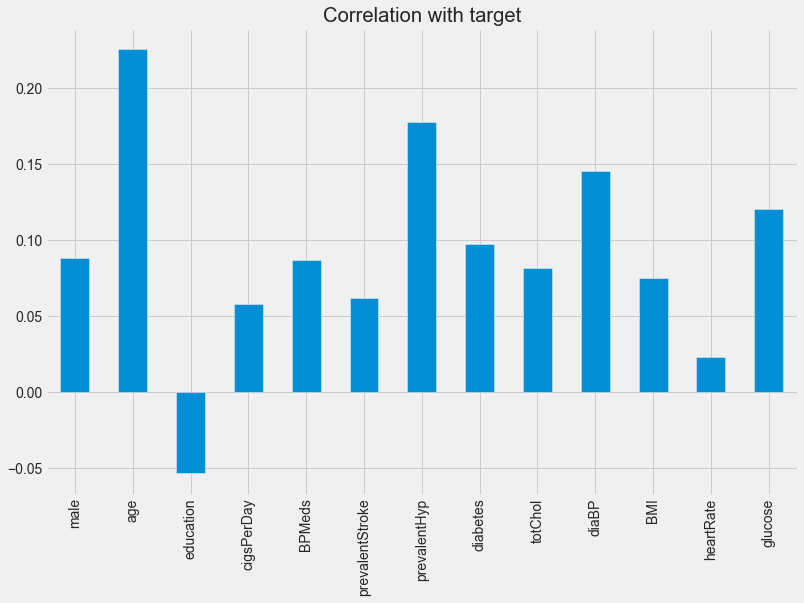

In [29]:
X.corrwith(Y).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
test_accuracy_sklearn = accuracy_score(y_test, y_pred)

print(f"\nAccuracy score: {test_accuracy_sklearn}")


Accuracy score: 0.8655660377358491


In [35]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1459
           1       0.68      0.07      0.13       237

    accuracy                           0.87      1696
   macro avg       0.77      0.53      0.53      1696
weighted avg       0.84      0.87      0.82      1696



In [36]:
from sklearn.model_selection import cross_val_score 
scores1 = cross_val_score(LogisticRegression(C=0.5),X_train, y_train, cv=10)
np.average(scores1)

0.8415917863208275

In [37]:
scores2 = cross_val_score(LogisticRegression(C=10),X_train, y_train, cv=10)
np.average(scores2)

0.8415917863208275

In [38]:
scores3 = cross_val_score(LogisticRegression(C=7.5),X_train, y_train, cv=3)
np.average(scores3)

0.8400157232704403

In [39]:
logreg = LogisticRegression(class_weight='balanced')

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
seed = 45
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,Y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = Y.loc[train_index],Y.loc[test_index]

    #model
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)
    i+=1

1 of KFold 5
ROC AUC score: 0.5075520833333333
2 of KFold 5
ROC AUC score: 0.527530700477623
3 of KFold 5
ROC AUC score: 0.5402529352783259
4 of KFold 5
ROC AUC score: 0.527530700477623
5 of KFold 5
ROC AUC score: 0.5218649933693438
